# Importing the dataframes

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

inventory_df = pd.read_excel("/content/Inventory Dataset.xlsx")
new_inventory_df = pd.read_excel("/content/New Inventory.xlsx")

# There are no duplicate "Item Number" in the Inventory Dataset

In [22]:
print(f"Total rows in dataframe = {len(inventory_df)}, Total number of \
'Item Number' values = {len(inventory_df['Item Number'].unique())}")
print(f"There is just {len(inventory_df['Date'].unique())} date value.")

Total rows in dataframe = 356, Total number of 'Item Number' values = 356
There is just 1 date value.


# Calculating the Date values for showing inventory on Weekly basis

In [23]:
unique_dates = sorted(new_inventory_df['Inventory Receive'].dt.date.unique())

weekly_date_cols = ["Item Number", str(datetime(2023, 6, 17).date())]
for dates in unique_dates:
  if abs((unique_dates[0] - dates).days) % 7 == 0:
    weekly_date_cols.append(str(dates))

# Calculating the unique "Item Number" after combining both the dataframes

In [24]:
unique_items = list(inventory_df["Item Number"].unique())
for items in list(new_inventory_df["Item Number"].unique()):
  unique_items.append(items)

unique_items = list(set(unique_items))

# Calculating the inventory levels for different items (weekly basis)

In [25]:
data_values = []
for items in unique_items:
  row_data = []

  row_data.append(items)

  if items in inventory_df["Item Number"].unique():
    if items in new_inventory_df["Item Number"].unique():
      row_data.append(int(inventory_df[inventory_df["Item Number"] == items]["Inventory"]))

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
         (new_inventory_df["Inventory Receive"] == weekly_date_cols[2])]["Total Item Qty"]))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[2], weekly_date_cols[3]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[3], weekly_date_cols[4]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[4], weekly_date_cols[5]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[5], weekly_date_cols[6]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[6], weekly_date_cols[7]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[7], weekly_date_cols[8]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[8], weekly_date_cols[9]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[9], weekly_date_cols[10]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[10], weekly_date_cols[11]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[11], weekly_date_cols[12]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[12], weekly_date_cols[13]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[13], weekly_date_cols[14]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[14], weekly_date_cols[15]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
          (new_inventory_df["Inventory Receive"].between(weekly_date_cols[15], weekly_date_cols[16]))]["Total Item Qty"].sum()))
      except:
        row_data.append(0)

    else:
      row_data.append(int(inventory_df[inventory_df["Item Number"] == items]["Inventory"]))

      for _ in range(len(weekly_date_cols)-2):
        row_data.append(0)

  elif items in new_inventory_df["Item Number"].unique():
    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
       (new_inventory_df["Inventory Receive"] == weekly_date_cols[1])]["Total Item Qty"]))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
       (new_inventory_df["Inventory Receive"] == weekly_date_cols[2])]["Total Item Qty"]))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[2], weekly_date_cols[3]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[3], weekly_date_cols[4]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[4], weekly_date_cols[5]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[5], weekly_date_cols[6]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[6], weekly_date_cols[7]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[7], weekly_date_cols[8]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[8], weekly_date_cols[9]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[9], weekly_date_cols[10]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[10], weekly_date_cols[11]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[11], weekly_date_cols[12]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[12], weekly_date_cols[13]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[13], weekly_date_cols[14]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[14], weekly_date_cols[15]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
        (new_inventory_df["Inventory Receive"].between(weekly_date_cols[15], weekly_date_cols[16]))]["Total Item Qty"].sum()))
    except:
      row_data.append(0)
  data_values.append(row_data)

# Displaying the table showing inventory levels at different dates (weekly basis)

In [26]:
weekly_df = pd.DataFrame(data_values, columns=weekly_date_cols)
weekly_df

,Item Number,2023-06-17,2023-07-07,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-18,2023-08-25,2023-09-08,2023-09-15,2023-09-22,2023-09-29,2023-10-13,2023-12-01,2023-12-08,2023-12-15
0,064-13-3896,7761,0,1400,0,0,0,1212,0,0,0,0,0,0,0,0,0
1,064-18-0169,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,064-18-4295,0,0,0,0,0,0,14820,0,0,5148,5148,0,0,0,0,0
3,064-01-1424,1452,1500,3236,0,0,0,0,0,0,0,0,0,0,0,0,0
4,064-13-9500,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,064-18-0211,0,0,0,0,0,0,0,0,0,0,0,11880,5444,5444,0,0
399,064-01-8348,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400,064-18-0267,8790,1302,6186,1302,2244,1344,402,0,0,0,0,1920,3840,1920,0,0
401,064-09-0466,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Displaying the table showing inventory levels at different dates (monthly basis)

In [27]:
monthly_df = pd.DataFrame()
monthly_df["Items"] = weekly_df["Item Number"]
monthly_df["July"] = weekly_df["2023-07-07"] + weekly_df["2023-07-14"] + weekly_df["2023-07-21"] + weekly_df["2023-07-28"]
monthly_df["Aug"] = weekly_df["2023-08-04"] + weekly_df["2023-08-18"] + weekly_df["2023-08-25"]
monthly_df["Sep"] = weekly_df["2023-09-08"] + weekly_df["2023-09-15"] + weekly_df["2023-09-22"] + weekly_df["2023-09-29"]
monthly_df["Oct"] = weekly_df["2023-10-13"]
monthly_df["Dec"] = weekly_df["2023-12-01"] + weekly_df["2023-12-08"] + weekly_df["2023-12-15"]
monthly_df

,Items,July,Aug,Sep,Oct,Dec
0,064-13-3896,1400,1212,0,0,0
1,064-18-0169,0,0,0,0,0
2,064-18-4295,0,14820,10296,0,0
3,064-01-1424,4736,0,0,0,0
4,064-13-9500,0,0,0,0,0
...,...,...,...,...,...,...
398,064-18-0211,0,0,11880,5444,5444
399,064-01-8348,0,0,0,0,0
400,064-18-0267,11034,1746,1920,3840,1920
401,064-09-0466,0,0,0,0,0


# Showing a Bar Chart to visualise the Total Monthly Inventory Levels

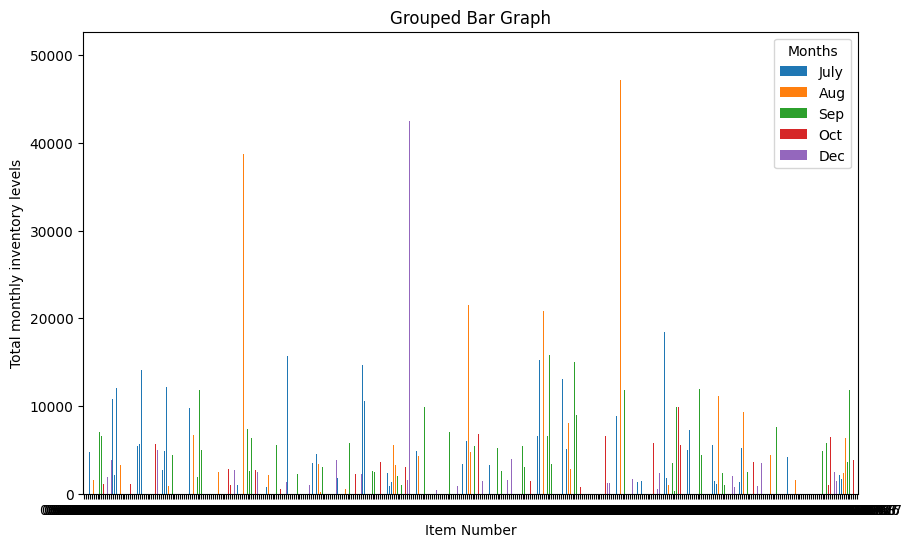

In [28]:
ax = monthly_df.plot(kind='bar', x='Items', y=['July', 'Aug', 'Sep', 'Oct', 'Dec'], rot=0, figsize=(10, 6))
plt.xlabel('Item Number')
plt.ylabel('Total monthly inventory levels')
plt.title('Grouped Bar Graph')
plt.legend(title='Months')
plt.show()